## This is a tutorial on how to get started with K-Means - Unsupervised

First you need to import the <b> relevant </b> libraries that we will use for this project

In [1]:
from sklearn.cluster import KMeans # This will be used for the algorithm

import matplotlib.pyplot as plt  # This will be use to plot the data
from sklearn import datasets   # This will be used to get a sample dataset - just to have some data

Now we can import some data to play around with and show them

In [2]:
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a real two-dim dataset
# the iris-data is a multidimensional data so we slice the first 
X = iris.data[:, :2]  
# Taking the first two columns - notation array[x,y] gives you the x-th row and the y-column
# if you want all values on the row i.e. an entire column use array[:,columnNr]
print(X) # just to print the data so we can see what we are dealing with

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

Okay, so let us just try to plot this data to see how it looks before we start working on it

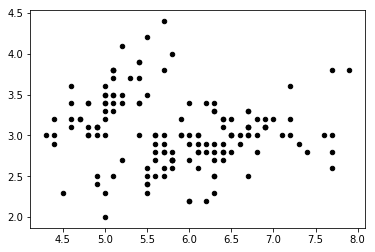

In [3]:
plt.figure() # creating a new figure
plt.scatter(X[:, 0], X[:, 1], color='black', s=20)  # plot x,y values using the color black and size = 20

So we see we have some more or less random 2D data. Now let us to try to group the data (cluster):

In [4]:
k = 2 
#running kmeans clustering into two
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)  
# the random state is optionlly, here it is specified so we get determistic clusters.
# this will contain the labels for our predicted clusters (either 0 or 1)   
labels = kmeans.labels_
# the centers of the calculated clusters
clusters = kmeans.cluster_centers_
# printing our cluster centers - there will be 2 of them.
print(clusters) 

[[ 5.22409639  3.1253012 ]
 [ 6.61044776  2.96567164]]


The above numbers show the two points (x and y of both) of the two cluster centers. 


Now we will try to define some colors and print the clustering - for k = 2

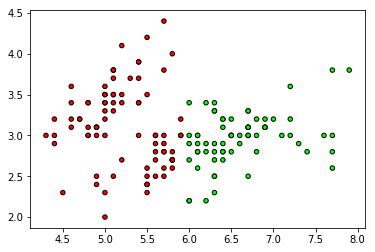

In [5]:
# need a new import
from matplotlib.colors import ListedColormap

# we define color lists to use with K values from 2 till 5
# the color values are simply RGB values, so the colormap for k = 2, will give red ($FF0000) and green ($00FF00) colors
cmap_bold = [ListedColormap(['#FF0000', '#00FF00']),
             ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
             ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00']),
             ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00','#00FFFF'])]

# now plot the same points, but this time assigning the colors to indicate the clusters

plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='black', cmap=cmap_bold[0], s=20)




The important thing is that we could now <b> predict <b> which cluster a new point should belong to. 
Let's take the point (6,4) which we might expect to belong to the red cluster and (6,2) which should probably belong to the green cluster (look at the graph to verify this):

In [6]:
print(kmeans.predict([[6, 4], [6, 2]]))


[0 1]


This is what we expected. 0 indicates the first cluster (red - numbering of clusters start at 0), 1 indicates that the second point belongs to the second cluster (green).
So based on previous data, we have learned to how to cluster previously unseen new data.

We can of course also decide we want more than 2 clusters - here you can see the code for k = 4 and the corresponding plot

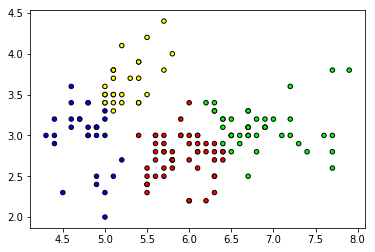

In [7]:
k = 4 
#running kmeans clustering into 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
# this will contain the labels for our predicted clusters (either 0,1,2, or 3)   
labels = kmeans.labels_
#using the color map with index 2 - which has 4 colors if you go back in the coode
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='black', cmap=cmap_bold[2], s=20)
